# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [2]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import lightgbm

from modules.utils import *

## Data Description


Column | Description
:---|:---
`client_id` | Unique ID of the client called [unique key]
`age_bracket` | Age bracket of the contacted client (in years)
`job` | job type of the contacted client
`marital` | marital status of the contacted client
`education` | highest level of education done by the client
`has_housing_loan` | Whether the client has a house loan (binary: yes,no)
`has_personal_loan` | Whether the client has a personal loan (binary: yes,no)
`prev_call_duration` | last contact duration (value = 0 if the client has not been contacted ever)
`days_since_last_call` | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
`num_contacts_prev` | number of contacts performed before this campaign and for this client (numeric)
`poutcome` | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
`contact_date` | date at which contact was made with the client (YYYY-MM-DD)
`cpi` | standing consumer price index before the call (monthly indicator)
`subs_deposit` | has the client subscribed to a term deposit? (binary: 1,0) [dependent variable]

## Data Wrangling & Visualization

In [3]:
# Loading Train data
data_train = pd.read_csv("train.csv", parse_dates = ['contact_date'])
data_train.head()
print(data_train.shape)

(4000, 14)


In [4]:
#Explore columns
data_train.columns

Index(['client_id', 'age_bracket', 'job', 'marital', 'education',
       'has_housing_loan', 'has_personal_loan', 'prev_call_duration',
       'days_since_last_call', 'num_contacts_prev', 'poutcome', 'contact_date',
       'cpi', 'subs_deposit'],
      dtype='object')

In [5]:
#Description
data_train.describe(percentiles = [0.05,0.5,0.95,0.975,0.99])

,client_id,prev_call_duration,days_since_last_call,num_contacts_prev,cpi,subs_deposit
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,22430.64275,3871.142250,903.150750,0.272000,107.348378,0.397500
std,12052.91754,26080.549053,293.323535,0.643132,107.885469,0.489442
min,17.00000,2.000000,0.000000,0.000000,92.201000,0.000000
5%,2543.90000,50.000000,6.000000,0.000000,92.431000,0.000000
50%,23336.50000,237.000000,999.000000,0.000000,93.444000,0.000000
95%,39701.30000,1030.100000,999.000000,2.000000,94.465000,1.000000
97.5%,40633.02500,1269.050000,999.000000,2.000000,94.465000,1.000000
99%,40922.02000,157400.000000,999.000000,3.000000,946.010000,1.000000
max,41186.00000,419900.000000,999.000000,6.000000,947.670000,1.000000


In [6]:
data_train.head()

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
0,41020,41-60,white-collar,divorced,bachelors,yes,no,283,3,1,success,2018-07-09,92.379,1
1,23720,60+,other,divorced,secondary,no,yes,169,6,2,success,2018-05-07,94.215,1
2,29378,41-60,white-collar,married,bachelors,no,no,552,999,0,nonexistent,2018-01-08,93.444,1
3,36636,25-40,technician,single,senior_secondary,yes,yes,206,999,0,nonexistent,2018-02-11,93.200,0
4,38229,18-24,white-collar,single,bachelors,no,no,341,999,0,nonexistent,2018-04-04,93.075,1


## Visualization, Modeling, Machine Learning

 Can you help Lending Bank to predict whether a client would subscribe to the term deposit and explain how different features affect that? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of F1 score.**
- **Read the test.csv file and prepare features for testing.**

In [7]:
data_train.columns

Index(['client_id', 'age_bracket', 'job', 'marital', 'education',
       'has_housing_loan', 'has_personal_loan', 'prev_call_duration',
       'days_since_last_call', 'num_contacts_prev', 'poutcome', 'contact_date',
       'cpi', 'subs_deposit'],
      dtype='object')

In [8]:
# year month day 
data_train['year'] = pd.DatetimeIndex(data_train['contact_date']).year
data_train['month'] = pd.DatetimeIndex(data_train['contact_date']).month
data_train['day'] = pd.DatetimeIndex(data_train['contact_date']).day

In [9]:
#Loading Test data
data_test=pd.read_csv("test.csv",parse_dates = ['contact_date'])
print(data_test.shape)
data_test.head()

(1000, 13)


,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi
0,19271,25-40,pink-collar,married,senior_secondary,no,no,176700,999,0,nonexistent,2018-03-07,93.918
1,36488,41-60,other,married,secondary,no,no,597,3,2,success,2018-01-11,947.670
2,2750,41-60,white-collar,married,secondary,yes,no,358,999,0,nonexistent,2018-01-05,93.994
3,4797,25-40,white-collar,single,senior_secondary,no,no,197,999,1,failure,2018-01-05,92.893
4,29971,41-60,technician,married,masters,yes,no,210,999,0,nonexistent,2018-01-08,92.201


In [10]:
print(f"""The shape of training data is {data_train.shape} and that of testing data is {data_test.shape}""")

The shape of training data is (4000, 17) and that of testing data is (1000, 13)


The target data is not balanced, with less for positive label.

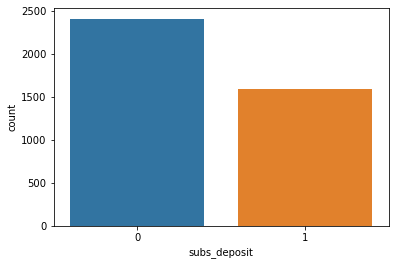

In [11]:
# Let's have a look at the distribution of predicting labels
sns_plot =sns.countplot(x='subs_deposit',data=data_train)

There are no missing values in the dataset.

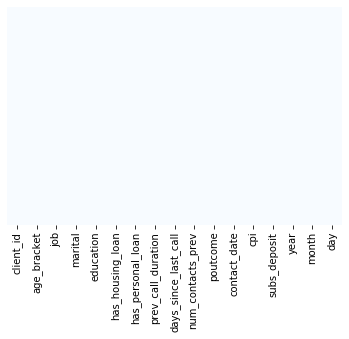

In [12]:
# Check the missing values
#visualiation of misssing value in heat map
sns.heatmap(data_train.isnull(), yticklabels=False,cbar=False,cmap='Blues')

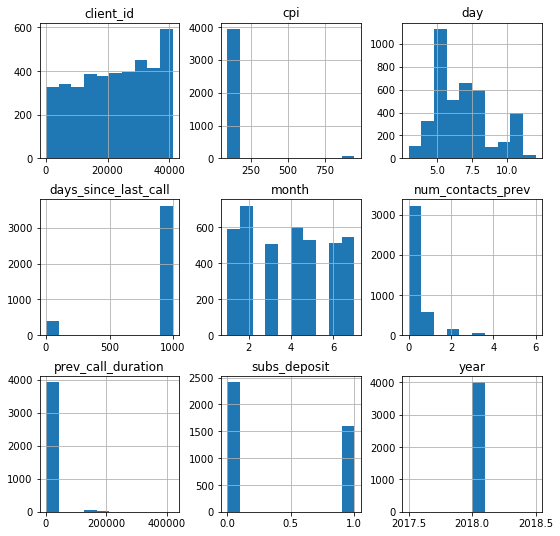

In [13]:
data_train.hist(figsize=(9,9))
plt.show()

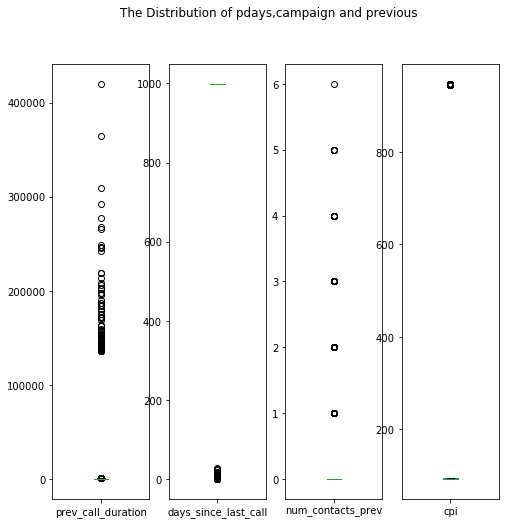

In [14]:
#showing outlers in duration and campaign cloumn
dist_dur_cam = data_train[['prev_call_duration','days_since_last_call','num_contacts_prev','cpi']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,4),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of pdays,campaign and previous')
plt.show()

age_bracket


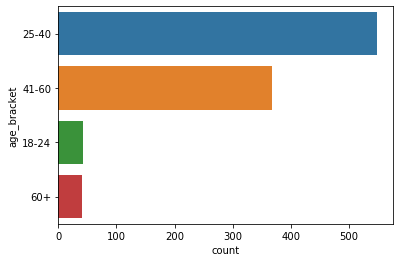

job


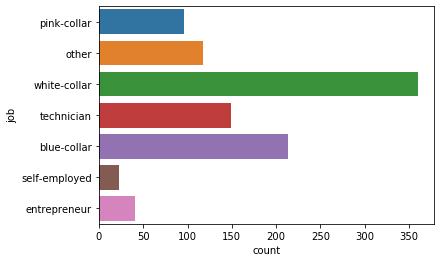

marital


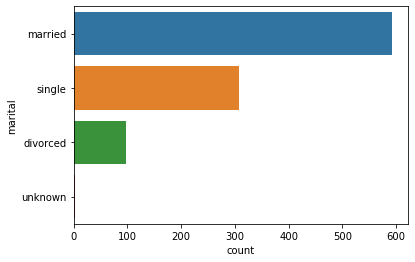

education


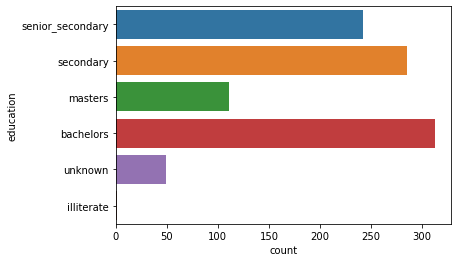

has_housing_loan


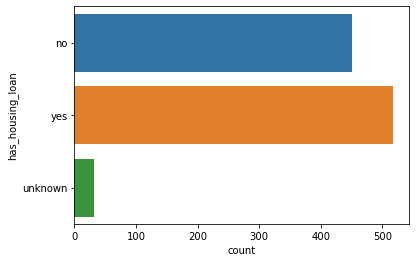

has_personal_loan


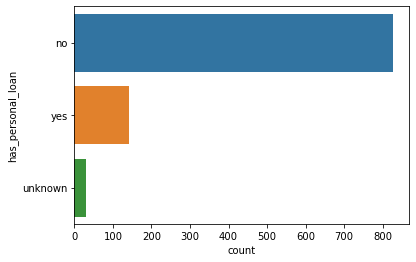

poutcome


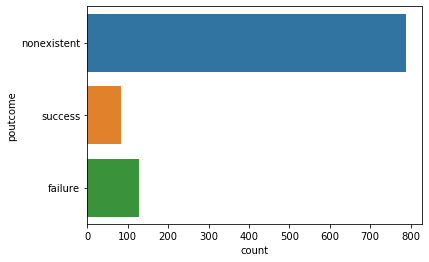

In [15]:
for feature in data_test.dtypes[data_test.dtypes == 'object'].index:
    print(feature)
    sns.countplot(y=feature, data=data_test)
    plt.show()

In [16]:
data_train[data_train['marital'] == 'unknown']

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit,year,month,day
185,35654,25-40,white-collar,unknown,masters,yes,no,125,999,1,failure,2018-01-11,93.200,0,2018,1,11
1195,12177,25-40,blue-collar,unknown,secondary,no,yes,34,999,0,nonexistent,2018-04-05,93.994,0,2018,4,5
1614,1843,25-40,white-collar,unknown,bachelors,no,no,257,999,0,nonexistent,2018-07-05,92.893,0,2018,7,5
2438,29214,25-40,white-collar,unknown,bachelors,yes,no,529,999,0,nonexistent,2018-01-08,93.444,1,2018,1,8
3408,37560,25-40,technician,unknown,bachelors,no,no,173,6,2,success,2018-05-03,93.369,1,2018,5,3
3697,37559,25-40,technician,unknown,bachelors,no,no,977,11,2,success,2018-05-03,93.369,1,2018,5,3
3921,33088,25-40,entrepreneur,unknown,bachelors,no,no,164,999,0,nonexistent,2018-04-10,92.431,1,2018,4,10
3988,40103,25-40,white-collar,unknown,bachelors,no,no,517,999,0,nonexistent,2018-02-04,93.075,0,2018,2,4


In [17]:
data_train[data_train['education'] == 'illiterate']

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit,year,month,day
117,36124,25-40,self-employed,married,illiterate,yes,no,488,999,0,nonexistent,2018-01-11,93.200,1,2018,1,11
494,28639,60+,other,married,illiterate,yes,yes,125,6,1,success,2018-07-08,92.201,1,2018,7,8
1597,29968,41-60,other,divorced,illiterate,no,no,128,999,0,nonexistent,2018-01-08,92.201,1,2018,1,8
3815,29977,41-60,other,divorced,illiterate,no,no,146,999,0,nonexistent,2018-01-08,92.201,0,2018,1,8


age_bracket


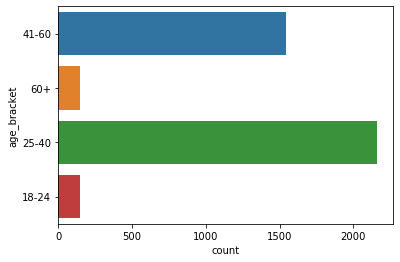

job


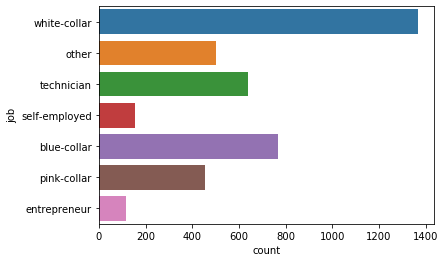

marital


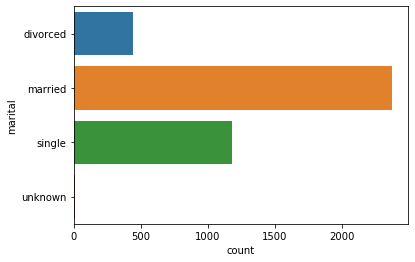

education


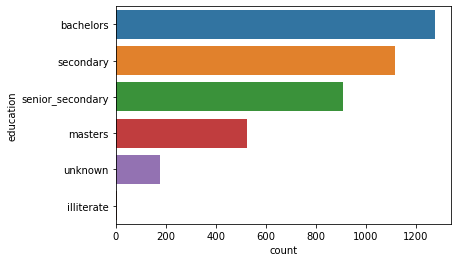

has_housing_loan


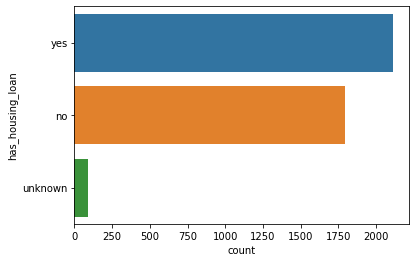

has_personal_loan


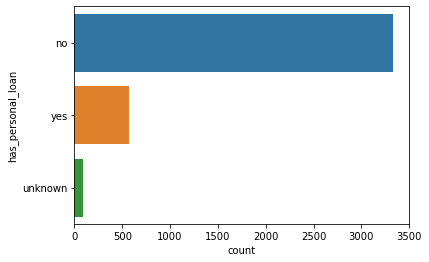

poutcome


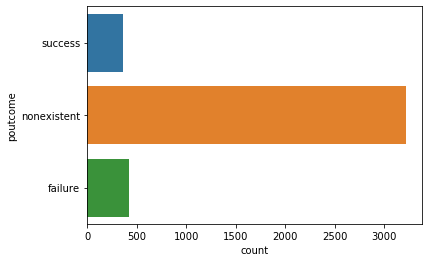

In [18]:
for feature in data_train.dtypes[data_train.dtypes == 'object'].index:
    print(feature)
    sns.countplot(y=feature, data=data_train)
    plt.show()

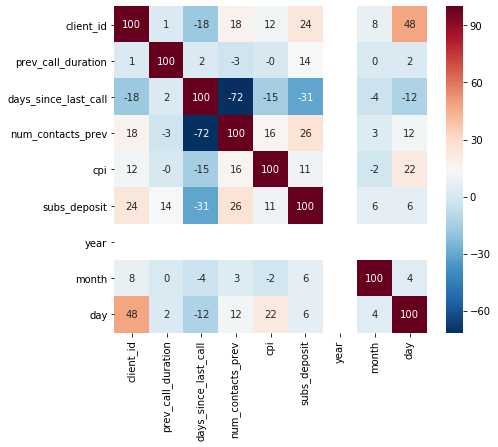

In [19]:
correlations = data_train.corr()

# Increase the figsize to 7 x 6
plt.figure(figsize=(7,6))

# Plot heatmap of correlations
sns.heatmap(correlations*100, cmap='RdBu_r', annot=True, fmt='0.0f')

plt.show()

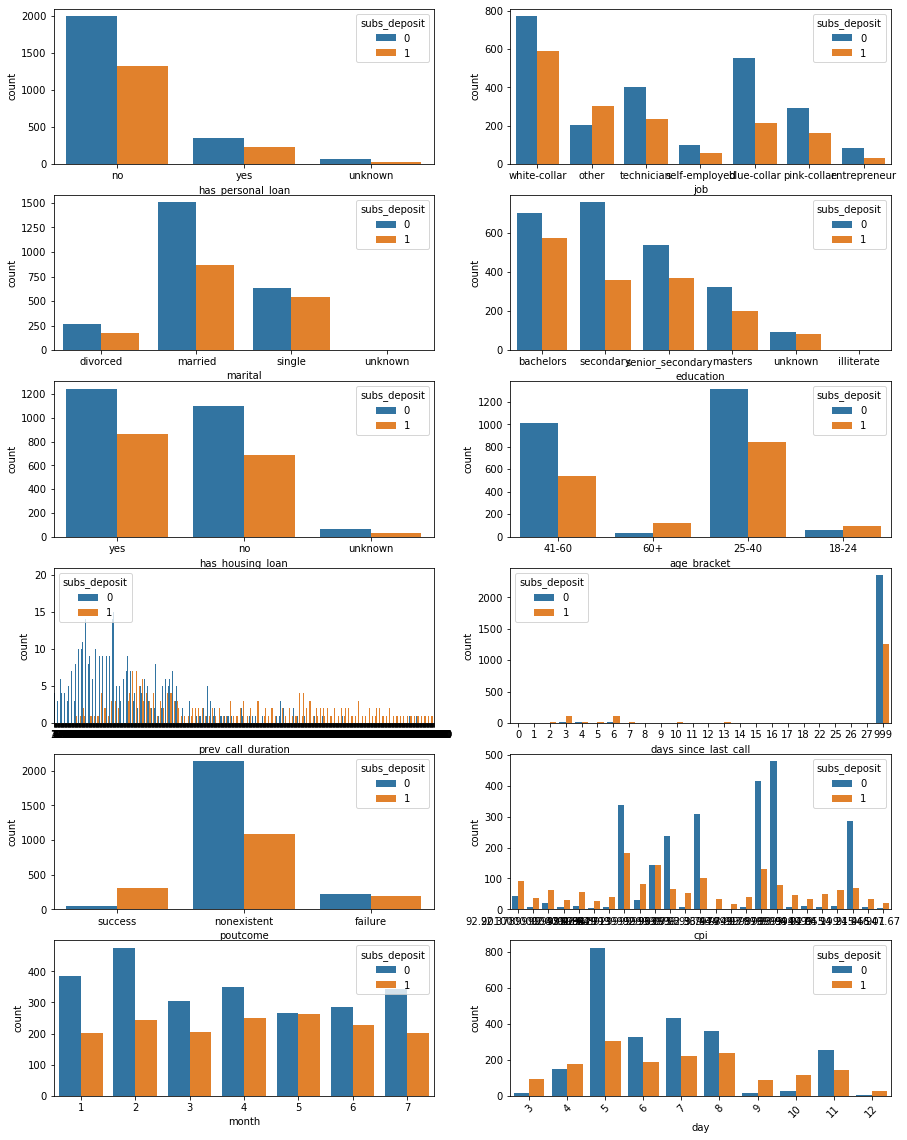

In [20]:
%matplotlib inline 
#lets ahve a look at how  target variable ' target' distrubuted across  individual atrributes ,using income as hue
fig, ((a,b),(c,d),(e,f),(g,h),(l,m), (i,j)) = plt.subplots(6,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(data_train['age_bracket'],hue=data_train['subs_deposit'],ax=f)
sns.countplot(data_train['job'],hue=data_train['subs_deposit'],ax=b)
sns.countplot(data_train['marital'],hue=data_train['subs_deposit'],ax=c)
sns.countplot(data_train['education'],hue=data_train['subs_deposit'],ax=d)
sns.countplot(data_train['has_housing_loan'],hue=data_train['subs_deposit'],ax=e)
sns.countplot(data_train['has_personal_loan'],hue=data_train['subs_deposit'],ax=a)
sns.countplot(data_train['prev_call_duration'],hue=data_train['subs_deposit'],ax=g)
sns.countplot(data_train['days_since_last_call'],hue=data_train['subs_deposit'],ax=h)

sns.countplot(data_train['poutcome'],hue=data_train['subs_deposit'],ax=l)
sns.countplot(data_train['cpi'],hue=data_train['subs_deposit'],ax=m)

sns.countplot(data_train['month'],hue=data_train['subs_deposit'],ax=i)
sns.countplot(data_train['day'],hue=data_train['subs_deposit'],ax=j)

* __has personal loan__: Subcribers has less loan.
* __job__: Subcribers show higher numbers in Others. Other high values (but less than nonsubcribers) are in white collars, techinican, blue collar.
* __marital__: Married subcribers has highest value among three categories.
* __has housing loan__: Subcribers with a housing loan has highest value
* __age bracket__: Subcribers in group 60+ and 18-24 have higher value than non-subscribers, though the highesh number of subscribers is in age 25-40.
* __prev call__: Non-subcribers has less duration.
* __days since last call__: There is an abnomal value of 9999, in general subcribers are within 30 days since last call
* __cpi__: Subcribers are higher in lower and higher end of the cpi.
* __month__: Subcribers are more in months of 4 5 6 7 
* __day__: Subcribers are more in days of 3 4 5 6 7

In [21]:
#One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies
trans_data_train = pd.get_dummies(data_train.copy().drop(columns = ['client_id','year','contact_date']))
print(trans_data_train.shape)
trans_data_train.head()
print(f"Number of feautures after one-hot encoding {format(len(list(trans_data_train)))}")

(4000, 37)
Number of feautures after one-hot encoding 37


In [22]:
data_test['month'] = pd.DatetimeIndex(data_test['contact_date']).month
data_test['day'] = pd.DatetimeIndex(data_test['contact_date']).day
trans_data_test = pd.get_dummies(data_test.copy().drop(columns = ['client_id','contact_date']))
print(trans_data_test.shape)
trans_data_test.head()

(1000, 36)


,prev_call_duration,days_since_last_call,num_contacts_prev,cpi,month,day,age_bracket_18-24,age_bracket_25-40,age_bracket_41-60,age_bracket_60+,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,marital_unknown,education_bachelors,education_illiterate,education_masters,education_secondary,education_senior_secondary,education_unknown,has_housing_loan_no,has_housing_loan_unknown,has_housing_loan_yes,has_personal_loan_no,has_personal_loan_unknown,has_personal_loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,176700,999,0,93.918,3,7,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,597,3,2,947.670,1,11,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,358,999,0,93.994,1,5,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
3,197,999,1,92.893,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,210,999,0,92.201,1,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0


In [23]:
#lets scale data to bring all dimensions to normal scale
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Apply Scaling  and wll drop drop the target cloumn'deposit_binary' 
std_scale = preprocessing.StandardScaler().fit(trans_data_train.drop('subs_deposit', axis=1))
X = std_scale.transform(trans_data_train.drop('subs_deposit', axis=1))
y = trans_data_train['subs_deposit']

In [24]:
#will split data in to training and tests using random test function
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2800 samples.
Testing set has 1200 samples.




**The bank wants to know what are the most important features for your model.  Can you tell them?**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [25]:
#############################################################
# parameter tuning
#############################################################

# Do we want to re-tune for the best parameters we can find? If not we will use pre-defined parameters
df_features = trans_data_train.copy().drop(columns = ['subs_deposit'])
df_labels = data_train['subs_deposit'].copy()
metric_name = 'f1Score'
max_eval_param_tuning = 20
ml_method = "lightGBM" #lightGBM
learning_threshold = 0.6
feature_importance = "True"
parameter_tuning = False # change to True if tuning

X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.33, random_state=42, stratify=df_labels)
# Do we do re-sampling?
from collections import Counter
ratio = Counter(df_labels)[0] / Counter(df_labels)[1]
if (ratio > 10 or ratio < 0.1):
    print('we should resampling')
    X, y = smote_resampling(df_features, df_labels, X_train, y_train, ratio)
else:
    print('Resampling is not needed')
    X, y = X_train, y_train

# Do we want to re-tune for the best parameters we can find? If not we will use pre-defined parameters
if parameter_tuning:
    params = perform_parameter_tuning(df_features, df_labels, metric_name, max_eval_param_tuning)
else:
    params = read_predefined_parameters(ml_method)


#############################################################
# Final validation and training scores
#############################################################

# Get the training and validation scores for the chosen model, params and datasets.
# This process is only to validate how effective the model is.
if ml_method == 'lightGBM':
    training_scores, cv_scores, log_loss_technique, test_ev, pred, model_opti, best_iteration = MLTechniques.lgbm_teq(params, X, y, X_test, y_test, 5)
elif ml_method == 'XGBoost':
    training_scores, cv_scores, log_loss_technique, test_ev, pred, model_opti = MLTechniques.xgb_teq(params, X, y, X_test, y_test, 5)

Resampling is not needed
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's binary_logloss: 0.394258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[31]	valid_0's binary_logloss: 0.393452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[32]	valid_0's binary_logloss: 0.387887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[33]	valid_0's binary_logloss: 0.383979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	valid_0's binary_logloss: 0.382618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	valid_0's binary_logloss: 0.379989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	valid_0's binary_logloss: 0.376207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	valid_0's binary_logloss: 0.373548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will b

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will b

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will b

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=150 will b

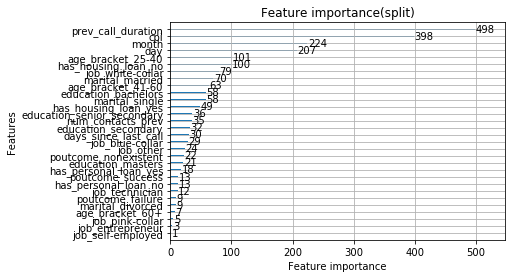

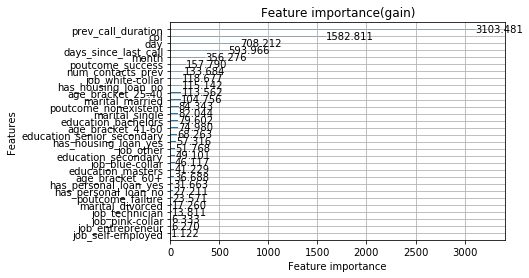

In [26]:
# evaluate the trained model using sklearn.metrics, ROCAUC, and precision recall curves.
# Then output these evaluations to s3.
validation_metric = evaluate_trained_model(test_ev, y_test)
validation_metric = validation_metric.applymap(str)

# feature importance plots using lightgbm. Output them to s3.
if feature_importance:
    fig_split, fig_gain = lgbm_importance_plot(model_opti)

In [27]:
# LGBM is the best performance so far 0.83, XGBOOST is around 0.77
validation_metric

,metric,value
0,f1Score,0.8204651162790697


In [35]:
# Creating a dataframe of the predicted data, yep probablity, no probability and binary classification
learning_threshold = 0.5
# predict with optimal model
prob_output = model_opti.predict(trans_data_test, num_iteration=best_iteration)
# preparing output
client_ids = data_test['client_id']
data_sub = pd.DataFrame()
data_sub['client_id'] = client_ids
data_sub['yesprob'] = list(prob_output)
data_sub['noprob'] = list(1 - prob_output)
data_sub.index = data_test.index

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the Test set (test.csv), you must predict the 'subs_deposit' variable (1/0). The 1/0 would depend on the **best F1 score**.
    You should submit a CSV file with test entries plus a header row. Your submission will show an error if you have extra columns beyond 'client_id' and 'subs_deposit' or extra rows.
The file (`submission.csv`) should have exactly 2 columns:
    - **client_id**
    - **subs_deposit** (contains 1/0)

In [39]:
# Write your code here
# Make a prediction label based on learning_threshold
for j in data_sub.index:
    if (data_sub.at[j, 'yesprob'] >= learning_threshold):
        data_sub.at[j, 'subs_deposit'] = 1
    else:
        data_sub.at[j, 'subs_deposit'] = 0

In [40]:
data_sub

,client_id,yesprob,noprob,sub_deposit,subs_deposit
0,19271,0.910025,0.089975,1.0,1.0
1,36488,0.826321,0.173679,1.0,1.0
2,2750,0.090377,0.909623,0.0,0.0
3,4797,0.089905,0.910095,0.0,0.0
4,29971,0.509020,0.490980,1.0,1.0
...,...,...,...,...,...
995,5667,0.009636,0.990364,0.0,0.0
996,17791,0.501841,0.498159,1.0,1.0
997,38287,0.926286,0.073714,1.0,1.0
998,29150,0.817115,0.182885,1.0,1.0


In [41]:
#Submission
data_sub[['client_id','subs_deposit']].to_csv('submissions.csv',index=False)